# This is the latency comparasion research of different RTP stream viewers
## Variants
Next RTP view aproaches are compared:
1. RPI-4 gstreamer-kms
2. RPI-4 gstreamer-qt

RTP stream provided by OpenIPC camera. See Appendix 3

Display 60hz 2048*1536 H:98.2KHz PCLK:223.1MHz

## Experiment procedure:
Each case is recorded with 200 FPS camera(GoPro hero 9. Fixed shutter 1/400).  
Frames between LED-ON in real and at screan is measured by Kinovea software

## Gstreamer pipelines:
### KMS pipeline
```
gst-launch-1.0 udpsrc port=5600 caps='application/x-rtp, media=(string)video, clock-rate=(int)90000, encoding-name=(string)H264' ! rtpjitterbuffer latency=7 ! rtph264depay ! h264parse ! v4l2h264dec ! kmssink sync=false
```

### GL pipeline
```
gst-launch-1.0 udpsrc port=5600 caps='application/x-rtp, media=(string)video, clock-rate=(int)90000, encoding-name=(string)H264' ! rtpjitterbuffer latency=7 ! rtph264depay ! h264parse ! v4l2h264dec ! glimagesink sync=false
```

Installed Packages Plotly.NET, 4.2.0 Plotly.NET.ImageExport, 5.0.1 Plotly.NET.Interactive, 4.2.0

<!-- Plotly chart will be drawn inside this DIV -->

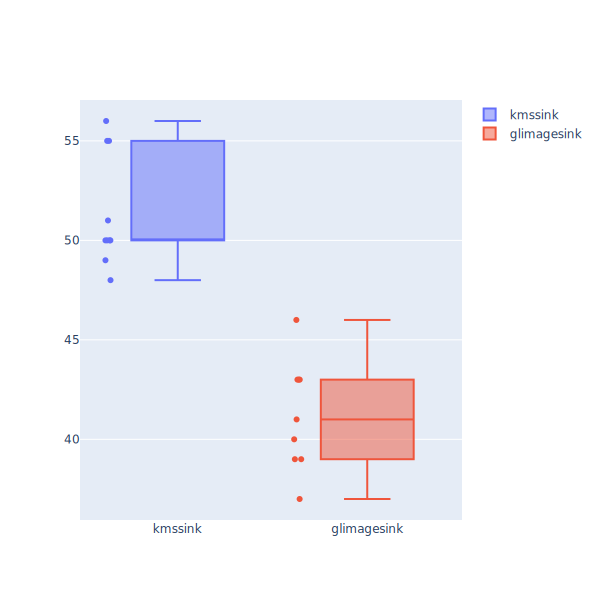

In [4]:
#r "nuget: Plotly.NET, 4.2.0"
#r "nuget: Plotly.NET.Interactive, 4.2.0"
#r "nuget: Plotly.NET.ImageExport"

open Plotly.NET 
open Plotly.NET.ImageExport

let kmsSink     = [50;55;50;50;55;50;51;56;48;49]
let glimageSink = [41;43;46;39;39;43;37;40;43]

let box =
    [
        Chart.BoxPlot(X = "y", Y = kmsSink, Name="kmssink",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
        Chart.BoxPlot(X = "y", Y = glimageSink, Name="glimagesink",Jitter=0.1,BoxPoints=StyleParam.BoxPoints.All);
    ]
    |> Chart.combine

display(box)

let svgString =
    box
    |> Chart.toSVGString()


DisplayExtensions.DisplayAs(svgString,"image/svg+xml")

# Appendix 1. System preparation
```sh
sudo apt update
sudo apt upgrade
sudo apt install -y gstreamer1.0-tools gstreamer1.0-gl gstreamer1.0-plugins-good gstreamer1.0-plugins-bad
```

# Appendix 2. Software state
## RPI-4
```sh
# Linux pi-dev 6.1.0-rpi7-rpi-v8 #1 SMP PREEMPT Debian 1:6.1.63-1+rpt1 (2023-11-24) aarch64 GNU/Linux

# Package: gstreamer1.0-tools
# Version: 1.22.0-2

# Package: gstreamer1.0-gl
# Version: 1.22.0-3+deb12u1

# Package: gstreamer1.0-plugins-good
# Version: 1.22.0-5+rpt1+deb12u1

# Package: gstreamer1.0-plugins-bad
# Version: 1.22.0-4+deb12u3
```

# Appendix 3. Camera
## Model and firmware
```
ssc338q (infinity6e family), imx415, 128 MB nand flash, 2.3.12.17-ultimate, openipc-ssc338q
```

## Majestic config
```yaml
system:
  webAdmin: enabled
  buffer: 1024
image:
  mirror: false
  flip: false
  rotate: none
  contrast: 50
  hue: 50
  saturation: 50
  luminance: 50
osd:
  enabled: false
  template: "%d.%m.%Y %H:%M:%S"
nightMode:
  enabled: false
records:
  enabled: false
  path: /mnt/mmcblk0p1/%F/%H.mp4
  maxUsage: 95
video0:
  enabled: true
  codec: h264
  bitrate: 7000
  size: 1920x1080
  rcMode: cbr
  fps: 45
video1:
  enabled: false
jpeg:
  enabled: true
mjpeg:
  size: 640x360
  fps: 5
  bitrate: 1024
audio:
  enabled: false
  volume: auto
  srate: 8000
rtsp:
  enabled: true
  port: 554
hls:
  enabled: false
youtube:
  enabled: false
motionDetect:
  enabled: false
  visualize: false
  debug: false
ipeye:
  enabled: false
watchdog:
  enabled: true
  timeout: 10
isp:
  exposure: 100
  antiFlicker: 50
  sensorConfig: /etc/sensors/imx415.bin
  aGain: 128
outgoing:
  server: udp://192.168.88.160:5600
  enabled: true
```

# Appendix 4. RPI contfig.txt
```ini
# For more options and information see
# http://rptl.io/configtxt
# Some settings may impact device functionality. See link above for details

# Uncomment some or all of these to enable the optional hardware interfaces
#dtparam=i2c_arm=on
#dtparam=i2s=on
#dtparam=spi=on

# Enable audio (loads snd_bcm2835)
dtparam=audio=on

# Additional overlays and parameters are documented
# /boot/firmware/overlays/README

# Automatically load overlays for detected cameras
camera_auto_detect=1

# Automatically load overlays for detected DSI displays
display_auto_detect=1

# Automatically load initramfs files, if found
auto_initramfs=1

# Enable DRM VC4 V3D driver
dtoverlay=vc4-kms-v3d
max_framebuffers=2

# Don't have the firmware create an initial video= setting in cmdline.txt.
# Use the kernel's default instead.
disable_fw_kms_setup=1

# Run in 64-bit mode
arm_64bit=1

# Disable compensation for displays with overscan
disable_overscan=1

# Run as fast as firmware / board allows
arm_boost=1

[cm4]
# Enable host mode on the 2711 built-in XHCI USB controller.
# This line should be removed if the legacy DWC2 controller is required
# (e.g. for USB device mode) or if USB support is not required.
otg_mode=1

[all]

```